In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install xlrd

You should consider upgrading via the 'c:\users\maryam hassan\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [10]:
#read the file
df = pd.read_excel('train.xlsx',  engine="openpyxl")

In [11]:
df.head()

,Listing ID,Listing Name,Host ID,Host Name,Host Since,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,...,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready,Price
0,19665213.0,*,156079597,Maximilian,2016-01-20,NaN,NaN,f,Prenzlauer Berg,Pankow,...,100.0,10.0,10.0,10.0,10.0,9.0,10.0,t,f,26.0
1,6436842.0,*,5302290,Dulie,2013-04-07,NaN,NaN,f,Pankow,Pankow,...,90.0,9.0,9.0,10.0,10.0,9.0,10.0,f,f,41.0
2,10559468.0,*,59151456,Geank,2016-02-07,NaN,NaN,f,Prenzlauer Berg,Pankow,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,50.0
3,27215482.0,*,193452785,Alix,2018-06-26,NaN,NaN,f,Friedrichshain,Friedrichshain-Kreuzberg,...,100.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,50.0
4,27287546.0,*,205870244,Lurina,2013-05-16,within a few hours,0.92,t,Prenzlauer Berg,Pankow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,55.0


In [12]:
df.shape

(15692, 39)

In [19]:
#drop the Listing ID column as it's an obvious redundant feature
df1 = df.drop(['Listing ID', 'Host ID'], axis=1)

In [20]:
#do some prelim data wrangling
df1.describe()

,Latitude,Longitude,Square Feet,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Price
count,15692.000000,15692.000000,303.000000,15692.000000,12730.000000,12721.000000,12722.000000,12719.000000,12722.000000,12721.000000,12720.000000,15683.000000
mean,52.509893,13.407334,445.900990,19.452014,94.717282,9.717475,9.328407,9.769164,9.779201,9.556874,9.458097,60.342983
std,0.031286,0.058646,414.817342,39.483853,7.069787,0.671793,1.023807,0.620347,0.619545,0.731109,0.788891,48.829687
min,52.369270,13.121400,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000
25%,52.488920,13.376025,0.000000,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,32.000000
50%,52.509100,13.417250,440.000000,5.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,49.000000
75%,52.532712,13.439750,700.000000,17.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,70.000000
max,52.639670,13.709020,1912.000000,424.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,900.000000


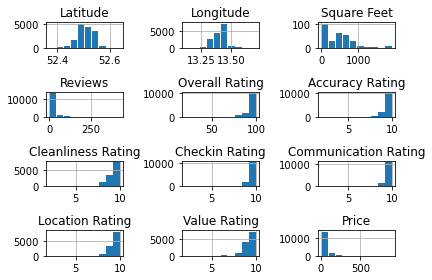

In [22]:
df1.hist(rwidth=0.9)
plt.tight_layout()

things to note/observe from the histogram
1. only latitude and longitude follows a somewhat normal distribution
2. the price feature doesnt follow a normal distribution

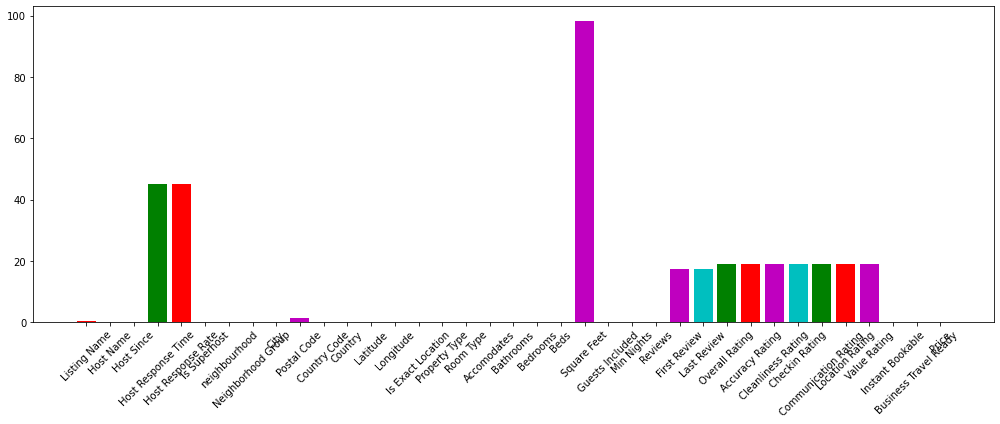

In [37]:
#check the percentage of missing values within each column
cols = df1.columns
values = df1.isnull().sum().values
percent = []
i = 0
for col in cols:
    per = (values[i]/df1.shape[0]) * 100
    percent.append(per)
    i = i + 1
colours = ['r', 'm','c', 'g']
plt.figure(figsize=(14, 6))
plt.xticks(rotation=45)
plt.bar(cols, percent, color=colours)
plt.tight_layout()

Things to note from the bar chart
1. the features 'host response time', 'host response' rate have almost 50% missing values while 
'square feet' feature has almost 100% missing values. it wouldnt make sense to keep these features since they cant contibute a lot to the model
2. The 'Host Name' feature as well as 'Listing Name' also redundant features

In [39]:
df1.columns

Index(['Listing Name', 'Host Name', 'Host Since', 'Host Response Time',
       'Host Response Rate', 'Is Superhost', 'neighbourhood',
       'Neighborhood Group', 'City', 'Postal Code', 'Country Code', 'Country',
       'Latitude', 'Longitude', 'Is Exact Location', 'Property Type',
       'Room Type', 'Accomodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Square Feet', 'Guests Included', 'Min Nights', 'Reviews',
       'First Review', 'Last Review', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Instant Bookable',
       'Business Travel Ready', 'Price'],
      dtype='object')

In [41]:
df1 = df1.drop(['Listing Name', 'Host Name','Host Response Time', 'Host Response Rate','Square Feet'], axis=1)
df1.shape

(15692, 32)

In [43]:
#now let's analyze the behavior of the predictor variable with each of the nuemric varibales
#select the numeric dfs
num_df = df1.select_dtypes(include=['float', 'int'])
num_df.head()

,Latitude,Longitude,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Price
0,52.54652,13.41792,100.0,10.0,10.0,10.0,10.0,9.0,10.0,26.0
1,52.56512,13.42214,90.0,9.0,9.0,10.0,10.0,9.0,10.0,41.0
2,52.54741,13.42521,100.0,10.0,10.0,10.0,10.0,10.0,10.0,50.0
3,52.50958,13.45144,100.0,10.0,10.0,10.0,10.0,10.0,9.0,50.0
4,52.52995,13.41558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0


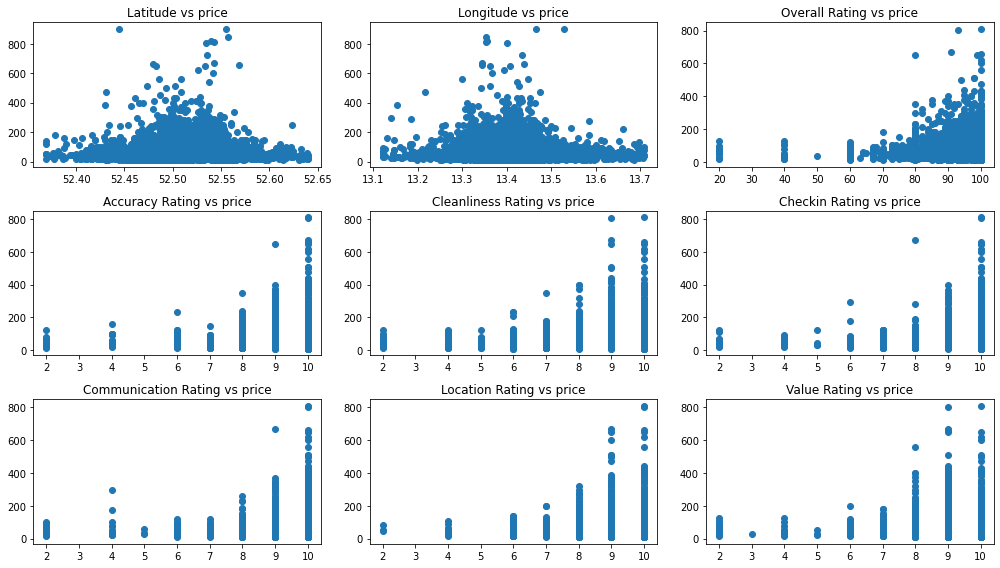

In [56]:
cols = num_df.columns[:-1] #to select all the columns except price
i = 1
plt.figure(figsize=(14,8))
for col in cols:
    plt.subplot(3,3,i)
    plt.title(f'{col} vs price')
    plt.scatter(df1[col], df1['Price'])
    i = i + 1
plt.tight_layout()    

things to note down from the chart
1. there seems to be no correlation between the longitude, latitude and the prices
2. it appears the overall rating is a total of all the ratings so keeping all those individual ratings will be useless

In [59]:
#lets see the correlation
df1.corr()

,Latitude,Longitude,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Price
Latitude,1.000000,-0.125704,0.034039,-0.014997,0.005152,0.003128,-0.022864,-0.008435,0.014398,0.006021,0.039158
Longitude,-0.125704,1.000000,-0.025254,0.014731,0.004334,0.010159,-0.000320,-0.001478,-0.019033,0.019888,-0.041581
Reviews,0.034039,-0.025254,1.000000,0.014673,0.064641,0.091543,0.063000,0.054394,0.070004,0.014114,0.078231
Overall Rating,-0.014997,0.014731,0.014673,1.000000,0.604565,0.650221,0.426195,0.477921,0.358226,0.625790,0.043537
Accuracy Rating,0.005152,0.004334,0.064641,0.604565,1.000000,0.491946,0.421730,0.476989,0.311203,0.537186,0.022770
Cleanliness Rating,0.003128,0.010159,0.091543,0.650221,0.491946,1.000000,0.360353,0.382767,0.275270,0.494632,0.072634
Checkin Rating,-0.022864,-0.000320,0.063000,0.426195,0.421730,0.360353,1.000000,0.515313,0.284469,0.413610,0.014200
Communication Rating,-0.008435,-0.001478,0.054394,0.477921,0.476989,0.382767,0.515313,1.000000,0.280340,0.424135,0.028882
Location Rating,0.014398,-0.019033,0.070004,0.358226,0.311203,0.275270,0.284469,0.280340,1.000000,0.383352,0.076058
Value Rating,0.006021,0.019888,0.014114,0.625790,0.537186,0.494632,0.413610,0.424135,0.383352,1.000000,-0.057623


things to note down from the corr map
1. overall rating is highly correlated with accuracy_rating, cleaniness rating, value_rating soo we may want to remove them
2. also, latitude and longitude are porrly correlated with the price variable

In [61]:
df1 = df1.drop(['Accuracy Rating', 'Cleanliness Rating','Value Rating','Latitude','Longitude'], axis=1)

In [65]:
#now let's check out the categorical variables
num_df = df1.select_dtypes(include=['float', 'int'])
num_df.head()

,Overall Rating,Checkin Rating,Communication Rating,Location Rating,Price
0,100.0,10.0,10.0,9.0,26.0
1,90.0,10.0,10.0,9.0,41.0
2,100.0,10.0,10.0,10.0,50.0
3,100.0,10.0,10.0,10.0,50.0
4,NaN,NaN,NaN,NaN,55.0


In [66]:
cat_df = df1.drop(num_df.columns.tolist(), axis=1)


,Host Since,Is Superhost,neighbourhood,Neighborhood Group,City,Postal Code,Country Code,Country,Is Exact Location,Property Type,...,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights,Reviews,First Review,Last Review,Instant Bookable,Business Travel Ready
0,2016-01-20,f,Prenzlauer Berg,Pankow,Berlin,10437,DE,Germany,t,Apartment,...,1,1,1,1,2,6,2017-07-07,2017-08-08,t,f
1,2013-04-07,f,Pankow,Pankow,Berlin,13187,DE,Germany,t,Apartment,...,1,2,2,2,7,6,2015-05-26,2019-04-30,f,f
2,2016-02-07,f,Prenzlauer Berg,Pankow,Berlin,10439,DE,Germany,t,Apartment,...,1,1,2,1,1,2,2016-04-19,2016-07-04,f,f
3,2018-06-26,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245,DE,Germany,t,Apartment,...,1,1,1,1,2,4,2018-07-31,2018-08-12,f,f
4,2013-05-16,t,Prenzlauer Berg,Pankow,Berlin,10405,DE,Germany,t,Apartment,...,1,1,2,1,6,0,NaT,NaT,t,f


In [68]:
cat_df = cat_df.drop(['Host Since', 'First Review', 'Last Review'], axis = 1)

In [67]:
df1 = df1.drop(['Host Since', 'First Review', 'Last Review'], axis = 1)

In [69]:
cat_df.head()

,Is Superhost,neighbourhood,Neighborhood Group,City,Postal Code,Country Code,Country,Is Exact Location,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights,Reviews,Instant Bookable,Business Travel Ready
0,f,Prenzlauer Berg,Pankow,Berlin,10437,DE,Germany,t,Apartment,Private room,2,1,1,1,1,2,6,t,f
1,f,Pankow,Pankow,Berlin,13187,DE,Germany,t,Apartment,Entire home/apt,2,1,2,2,2,7,6,f,f
2,f,Prenzlauer Berg,Pankow,Berlin,10439,DE,Germany,t,Apartment,Entire home/apt,3,1,1,2,1,1,2,f,f
3,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245,DE,Germany,t,Apartment,Private room,2,1,1,1,1,2,4,f,f
4,t,Prenzlauer Berg,Pankow,Berlin,10405,DE,Germany,t,Apartment,Private room,3,1,1,2,1,6,0,t,f


In [71]:
for col in cat_df.columns:
    print(col, cat_df[col].nunique())

Is Superhost 2
neighbourhood 63
Neighborhood Group 12
City 2
Postal Code 120
Country Code 1
Country 1
Is Exact Location 2
Property Type 16
Room Type 3
Accomodates 13
Bathrooms 8
Bedrooms 7
Beds 12
Guests Included 8
Min Nights 25
Reviews 289
Instant Bookable 2
Business Travel Ready 1


In [110]:
df1 = df1.drop(['Business Travel Ready', 'Country Code', 'Country'], axis = 1)

In [76]:
#it is observed that reviews should be a numerical and not a categorical variable
df1['Reviews'] = df1['Reviews'].astype('int')

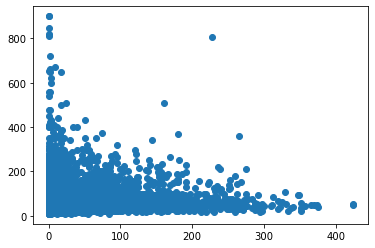

In [77]:
plt.scatter(df1['Reviews'], df1['Price']) #a trend is observed

In [79]:
#postal code has too many categories
cat_df = cat_df.drop(['Postal Code', 'Reviews'], axis=1)

In [113]:
cat_df.columns

Index(['Is Superhost', 'neighbourhood', 'Neighborhood Group', 'City',
       'Country Code', 'Country', 'Is Exact Location', 'Property Type',
       'Room Type', 'Accomodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Guests Included', 'Min Nights', 'Instant Bookable',
       'Business Travel Ready'],
      dtype='object')

In [114]:
new_df = cat_df.drop(['Accomodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Guests Included', 'Min Nights','Business Travel Ready', 'Country Code', 'Country'], axis = 1)

In [115]:
new_df.dropna(inplace=True)

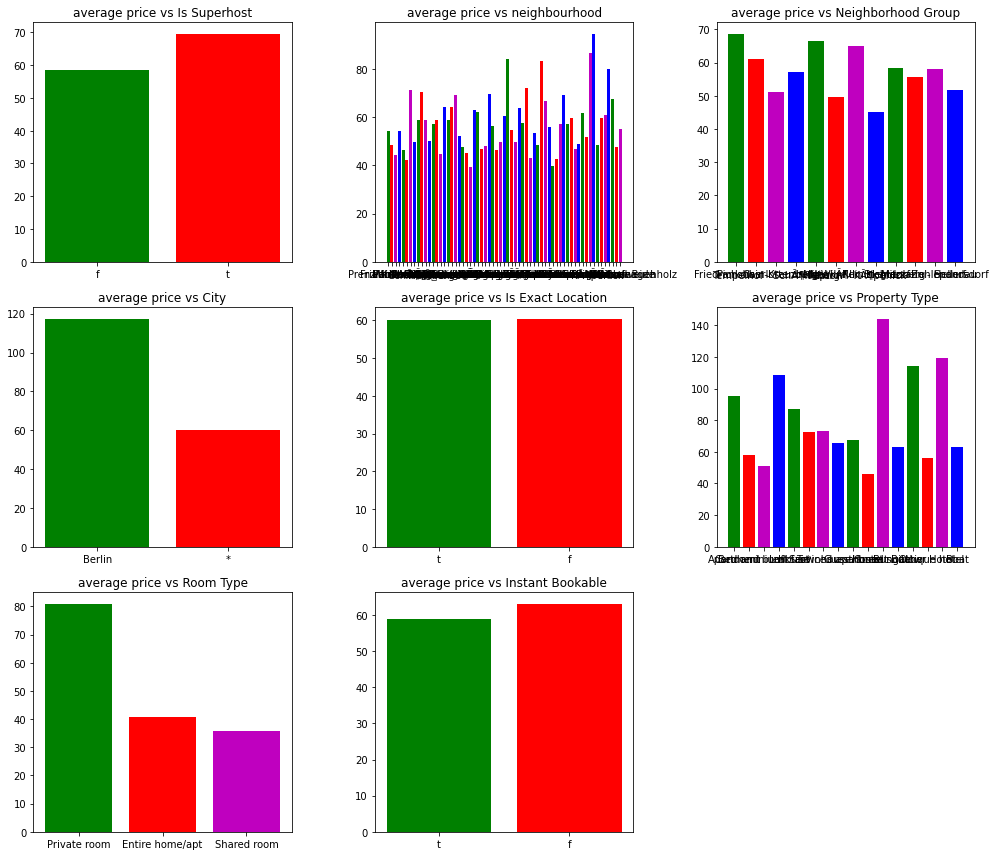

In [117]:

i = 1
plt.figure(figsize=(14,12))
for col in new_df.columns:
    cat_list = new_df[col].unique()
    cat_values = df1.groupby(col).mean()['Price']
    plt.subplot(3,3,i)
    plt.title(f'average price vs {col}')
    colours = ['g', 'r','m','b']
    plt.bar(cat_list, cat_values, color=colours)
    i =i+1
plt.tight_layout()    

things to note
1. no obvious correlation in the exact location with the price, as well as the instant bookable 

In [118]:
df1 = df1.drop(['Is Exact Location','Instant Bookable' ], axis=1)

In [122]:
df1 = df1.drop('neighbourhood', axis=1)

In [125]:
df1 = df1.drop('Postal Code', axis=1)

In [126]:
df1.shape

(15692, 17)

In [127]:
df1.head()

,Is Superhost,Neighborhood Group,City,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights,Reviews,Overall Rating,Checkin Rating,Communication Rating,Location Rating,Price
0,f,Pankow,Berlin,Apartment,Private room,2,1,1,1,1,2,6,100.0,10.0,10.0,9.0,26.0
1,f,Pankow,Berlin,Apartment,Entire home/apt,2,1,2,2,2,7,6,90.0,10.0,10.0,9.0,41.0
2,f,Pankow,Berlin,Apartment,Entire home/apt,3,1,1,2,1,1,2,100.0,10.0,10.0,10.0,50.0
3,f,Friedrichshain-Kreuzberg,Berlin,Apartment,Private room,2,1,1,1,1,2,4,100.0,10.0,10.0,10.0,50.0
4,t,Pankow,Berlin,Apartment,Private room,3,1,1,2,1,6,0,NaN,NaN,NaN,NaN,55.0


In [132]:
#visualize the outliers
df1['Price'].describe()

count    15683.000000
mean        60.342983
std         48.829687
min          8.000000
25%         32.000000
50%         49.000000
75%         70.000000
max        900.000000
Name: Price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x18e420a0>,
 'caps': [<matplotlib.lines.Line2D at 0x18e42400>,
 'boxes': [<matplotlib.lines.Line2D at 0x18e43ec8>],
 'medians': [<matplotlib.lines.Line2D at 0x18e42760>],
 'fliers': [<matplotlib.lines.Line2D at 0x18e428e0>],
 'means': []}

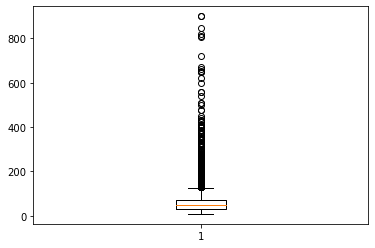

In [136]:
plt.boxplot(df1['Price'].dropna())

In [133]:
df1['Price'].quantile([0.05,0.1,0.15,0.9,0.95,0.99]) #there are outliers in the price feature

0.05     20.0
0.10     25.0
0.15     27.0
0.90    100.0
0.95    140.0
0.99    250.0
Name: Price, dtype: float64

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.6044622 , 0.6009862 , 0.6062698 , 0.6067475 , 0.6037562 ,
        0.60559636, 0.60277975, 0.6008438 , 0.6027918 , 0.6070442 ,
        0.604256  , 0.6029684 , 1.        , 0.6029684 , 0.604256  ,
        0.6070442 , 0.6027918 , 0.6008438 , 0.60277975, 0.60559636,
        0.6037562 , 0.6067475 , 0.6062698 , 0.6009862 , 0.6044622 ],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x18e160a0>)

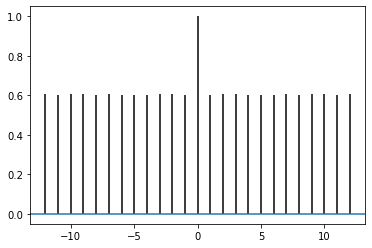

In [138]:
#check autocorrelation in price
df_corr = pd.to_numeric(df1['Price'].dropna(), downcast='float')
plt.acorr(df_corr, maxlags=12) #yaah, we have no autocorrelation

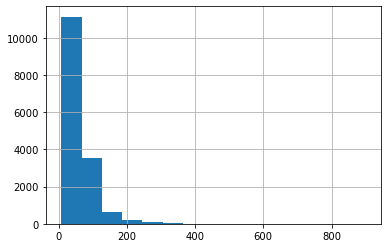

In [140]:
df1['Price'].hist(rwidth=9, bins=15)

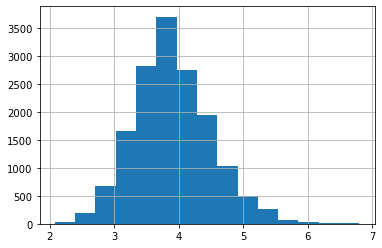

In [141]:
df_price = np.log(df1['Price'])
df_price.hist(rwidth=9, bins=15) #the log of our price is now normally distributed

In [142]:
df1['Price']= df_price

In [143]:
df1.head()

,Is Superhost,Neighborhood Group,City,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights,Reviews,Overall Rating,Checkin Rating,Communication Rating,Location Rating,Price
0,f,Pankow,Berlin,Apartment,Private room,2,1,1,1,1,2,6,100.0,10.0,10.0,9.0,3.258097
1,f,Pankow,Berlin,Apartment,Entire home/apt,2,1,2,2,2,7,6,90.0,10.0,10.0,9.0,3.713572
2,f,Pankow,Berlin,Apartment,Entire home/apt,3,1,1,2,1,1,2,100.0,10.0,10.0,10.0,3.912023
3,f,Friedrichshain-Kreuzberg,Berlin,Apartment,Private room,2,1,1,1,1,2,4,100.0,10.0,10.0,10.0,3.912023
4,t,Pankow,Berlin,Apartment,Private room,3,1,1,2,1,6,0,NaN,NaN,NaN,NaN,4.007333


In [ ]:
#deal with missing values and outliers


In [144]:
df1.to_csv('semi_final.csv')

In [156]:
to_change = ['Is Superhost', 'Neighborhood Group', 'City', 'Property Type','Room Type']
for col in to_change:
    df1[col]= df1[col].astype('category')

In [180]:
num_col = [ 'Accomodates', 'Bedrooms', 'Beds','Guests Included','Min Nights']


In [168]:
#removing rows with * as values
for col in num_col:
    df1 = df1[df1[col] != '*']

In [170]:
df1.head()

,Is Superhost,Neighborhood Group,City,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights,Reviews,Overall Rating,Checkin Rating,Communication Rating,Location Rating,Price,inver_price
0,f,Pankow,Berlin,Apartment,Private room,2,1,1,1,1,2,6,100.0,10.0,10.0,9.0,3.258097,26.0
1,f,Pankow,Berlin,Apartment,Entire home/apt,2,1,2,2,2,7,6,90.0,10.0,10.0,9.0,3.713572,41.0
2,f,Pankow,Berlin,Apartment,Entire home/apt,3,1,1,2,1,1,2,100.0,10.0,10.0,10.0,3.912023,50.0
3,f,Friedrichshain-Kreuzberg,Berlin,Apartment,Private room,2,1,1,1,1,2,4,100.0,10.0,10.0,10.0,3.912023,50.0
4,t,Pankow,Berlin,Apartment,Private room,3,1,1,2,1,6,0,NaN,NaN,NaN,NaN,4.007333,55.0


In [173]:
df1.shape

(15373, 18)

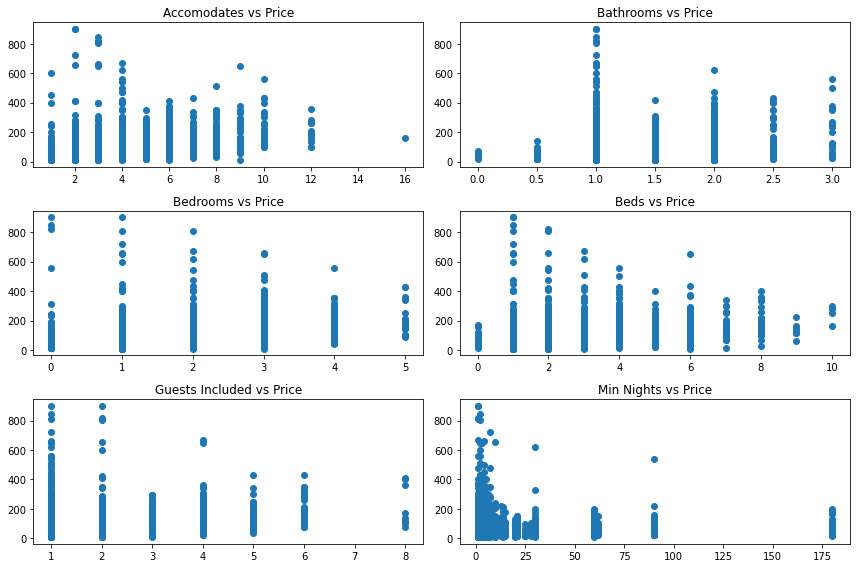

In [176]:
i =1
plt.figure(figsize=(12,8))
for col in num_col:
    plt.subplot(3,2,i)
    plt.title(f'{col} vs Price')
    plt.scatter(df1[col], df1['inver_price'])
    i = i+1
plt.tight_layout()    

In [177]:
df1 = df1.drop('Bathrooms', axis=1)

In [181]:
for col in num_col:
    df1[col] = df1[col].astype('int')

In [191]:
df1[df1['Overall Rating'].isnull()] #it is observed that most of the places where overall ratings is null, others are also null

,Is Superhost,Neighborhood Group,City,Property Type,Room Type,Accomodates,Bedrooms,Beds,Guests Included,Min Nights,Reviews,Overall Rating,Checkin Rating,Communication Rating,Location Rating,Price,inver_price
4,t,Pankow,Berlin,Apartment,Private room,3,1,2,1,6,0,NaN,NaN,NaN,NaN,4.007333,55.0
14,f,Reinickendorf,Berlin,Apartment,Entire home/apt,2,1,1,1,4,0,NaN,NaN,NaN,NaN,4.382027,80.0
16,f,Lichtenberg,Berlin,Apartment,Private room,1,1,1,1,6,0,NaN,NaN,NaN,NaN,3.555348,35.0
27,f,Charlottenburg-Wilm.,Berlin,Apartment,Private room,2,1,1,1,7,0,NaN,NaN,NaN,NaN,4.605170,100.0
37,f,Pankow,Berlin,Apartment,Private room,2,1,1,1,2,0,NaN,NaN,NaN,NaN,3.806662,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15675,f,Mitte,Berlin,Apartment,Entire home/apt,3,2,2,2,2,0,NaN,NaN,NaN,NaN,4.174387,65.0
15680,f,Mitte,Berlin,Apartment,Private room,2,1,1,1,2,0,NaN,NaN,NaN,NaN,3.401197,30.0
15683,f,Pankow,Berlin,Apartment,Entire home/apt,2,1,2,1,1,1,NaN,NaN,NaN,NaN,4.060443,58.0
15689,f,Mitte,Berlin,Apartment,Private room,2,1,1,1,1,0,NaN,NaN,NaN,NaN,2.944439,19.0


In [192]:
test = df1.dropna()

In [193]:
test.shape

(12494, 17)

In [195]:
test = test.drop('inver_price', axis=1)

In [196]:
dummy_df = pd.get_dummies(test, drop_first=True)

In [197]:
dummy_df.shape

(12494, 41)

In [199]:
#split into test and train
x = dummy_df.drop('Price', axis=1)
y = dummy_df['Price']

In [201]:
#split
from sklearn.model_selection import train_test_split

In [202]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1234)

In [203]:
from sklearn.linear_model import LinearRegression

In [204]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [205]:
y_pred = reg.predict(x_test)

In [206]:
r2_train = reg.score(x_train, y_train)
r2_test = reg.score(x_test, y_test)
print(r2_train, r2_test)

0.5096490092503263 0.48396135907527826


In [207]:
import math

In [208]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.41423468013751524

In [213]:
test_file = pd.read_excel('test(1).xlsx',engine="openpyxl")

In [258]:
Id = pd.read_excel('test(1).xlsx',engine="openpyxl")

In [214]:
test_file.shape

(7842, 38)

In [218]:
df1.head(1)

,Is Superhost,Neighborhood Group,City,Property Type,Room Type,Accomodates,Bedrooms,Beds,Guests Included,Min Nights,Reviews,Overall Rating,Checkin Rating,Communication Rating,Location Rating,Price,inver_price
0,f,Pankow,Berlin,Apartment,Private room,2,1,1,1,2,6,100.0,10.0,10.0,9.0,3.258097,26.0


In [219]:
#drop the variables that was dropped in the training set
test_file = test_file.drop(['Listing ID', 'Listing Name', 'Host ID', 'Host Name', 'Host Since',
       'Host Response Time', 'Host Response Rate','neighbourhood', 'Postal Code',
                            'Country Code', 'Country', 'Latitude', 'Longitude', 'Is Exact Location',
                         'Bathrooms','Square Feet','First Review', 'Last Review', 'Accuracy Rating',
       'Cleanliness Rating','Value Rating', 'Instant Bookable',
       'Business Travel Ready'
                           ], axis=1)

In [221]:
test_file.head(2)

,Is Superhost,Neighborhood Group,City,Property Type,Room Type,Accomodates,Bedrooms,Beds,Guests Included,Min Nights,Reviews,Overall Rating,Checkin Rating,Communication Rating,Location Rating
0,t,Friedrichshain-Kreuzberg,Berlin,Apartment,Entire home/apt,2,1,1,2,2,131,97.0,10.0,10.0,10.0
1,f,Friedrichshain-Kreuzberg,Berlin,Apartment,Entire home/apt,4,2,4,2,5,22,75.0,8.0,8.0,9.0


In [244]:
test_file.columns

Index(['Is Superhost', 'Neighborhood Group', 'City', 'Property Type',
       'Room Type', 'Accomodates', 'Bedrooms', 'Beds', 'Guests Included',
       'Min Nights', 'Reviews', 'Overall Rating', 'Checkin Rating',
       'Communication Rating', 'Location Rating'],
      dtype='object')

In [245]:
cat = ['Is Superhost', 'Neighborhood Group', 'City', 'Property Type',
       'Room Type']
for col in cat:
    test_file[col] = test_file[col].astype('category')

In [247]:
dummy_test = pd.get_dummies(test_file, drop_first=True)

In [248]:
dummy_test.shape

(7842, 40)

In [253]:
dummy_test.fillna(dummy_test.mean(), inplace=True)

In [254]:
pred = reg.predict(dummy_test)

In [257]:
pred_test = [np.exp(val) for val in pred]

In [259]:
listing_id = Id['Listing ID'].tolist()

In [266]:
data = {
       'Price':pred_test}

In [267]:
pd.DataFrame(data).to_csv('first_sub.csv', index=False, header=['prediction'])